In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
pip install nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/a6/0a/0d20d2c0f16be91b9fa32a77b76c60f9baf6eba419e5ef5deca17af9c582/nltk-3.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/a8/01/18232f93672c1d530834e2e0568a80eaab1df12d67ae499b1762ab462b5c/regex-2023.12.25-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 640.0 kB/s eta 0:00:01
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB 5.7 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 9.6


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\maxhi\OneDrive\Documents\BDA-696-Python\bda_696_env\Scripts\python.exe -m pip install --upgrade pip


In [8]:
song_data = pd.read_pickle("song_df_with_vectors.pkl")

In [21]:
song_data.columns

Index(['Unnamed: 0', 'artist', 'text', 'song', 'label', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'error',
       'cleaned_text', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'lyrics_vector',
       'lyric_length'],
      dtype='object')

In [9]:
song_data.head()

,Unnamed: 0,artist,text,song,label,danceability,energy,key,loudness,mode,...,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,lyrics_vector
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626,0.783,0.563,6.0,-8.613,1.0,...,0.000500,0.385384,0.095446,0.000500,0.000500,0.000500,0.000500,0.515669,0.000500,"[0.01842727, 0.011369616, -0.05919706, 0.15994..."
1,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371,0.293,0.604,1.0,-8.742,1.0,...,0.001334,0.001334,0.216557,0.001334,0.637525,0.136581,0.001334,0.001334,0.001334,"[0.03060027, -0.006800313, 0.03550704, 0.12838..."
2,12,Elis,I'm a lonely stranger \r\nIn this world of pai...,My Only Love,0.201,0.538,0.715,9.0,-5.090,0.0,...,0.003226,0.003226,0.003226,0.744179,0.049212,0.003227,0.003226,0.003226,0.184025,"[0.038891766, 0.024412412, 0.0143944, 0.124934..."
3,20,Elis,The long summer\nHas gone\nThe autumn leaves\n...,Rebirth,0.324,0.199,0.198,5.0,-13.103,0.0,...,0.001961,0.001961,0.001961,0.918334,0.001961,0.001961,0.001961,0.001961,0.065977,"[0.02268045, 0.07526063, -0.003750985, 0.08202..."
4,24,Elis,Don't dare to leave\r\nYou can't make a single...,Innocent Hearts,0.273,0.483,0.425,9.0,-7.912,0.0,...,0.001099,0.001099,0.001099,0.713435,0.001099,0.106893,0.001099,0.001099,0.171979,"[0.030382963, 0.04862272, 0.045493934, 0.12519..."


In [5]:
listener_data=pd.read_csv("triplets_file.csv")

In [6]:
listener_data.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [7]:
merged_data = pd.merge(listener_data, song_data, on='song_id')
merged_data.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,The Cove,Thicker Than Water,Jack Johnson,0
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,The Cove,Thicker Than Water,Jack Johnson,0


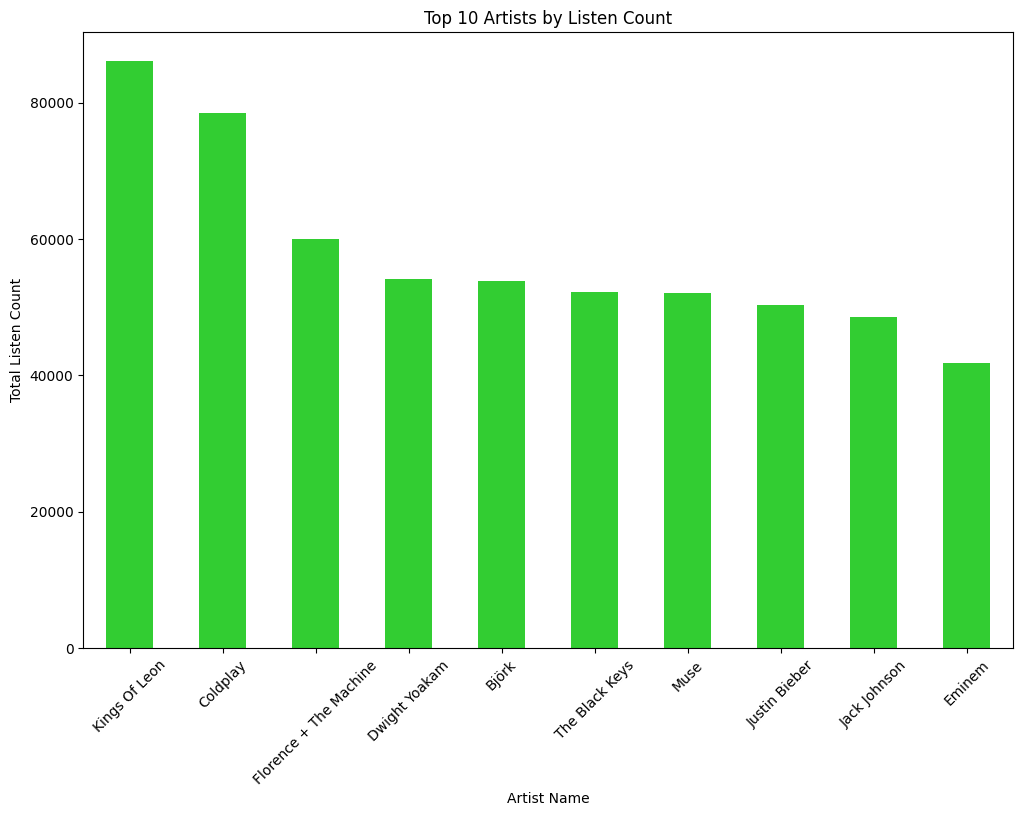

In [25]:
top_artists = merged_data.groupby('artist_name')['listen_count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_artists.plot(kind='bar', color='limegreen')
plt.xlabel('Artist Name')
plt.ylabel('Total Listen Count')
plt.title('Top 10 Artists by Listen Count')
plt.xticks(rotation=45)
plt.show()

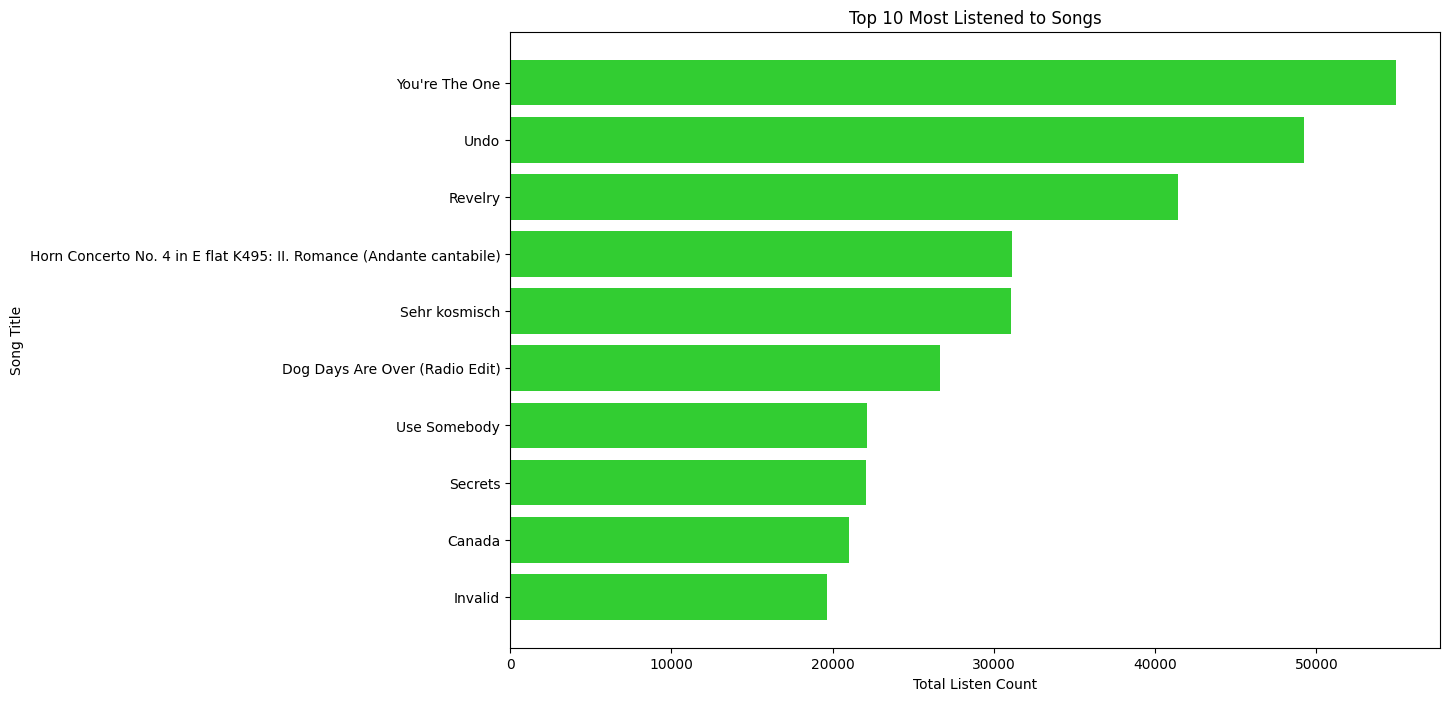

In [24]:
song_listen_counts = merged_data.groupby('title')['listen_count'].sum().reset_index()

top_songs = song_listen_counts.sort_values(by='listen_count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_songs['title'], top_songs['listen_count'], color='limegreen')
plt.xlabel('Total Listen Count')
plt.ylabel('Song Title')
plt.title('Top 10 Most Listened to Songs')
plt.gca().invert_yaxis() 
plt.show()

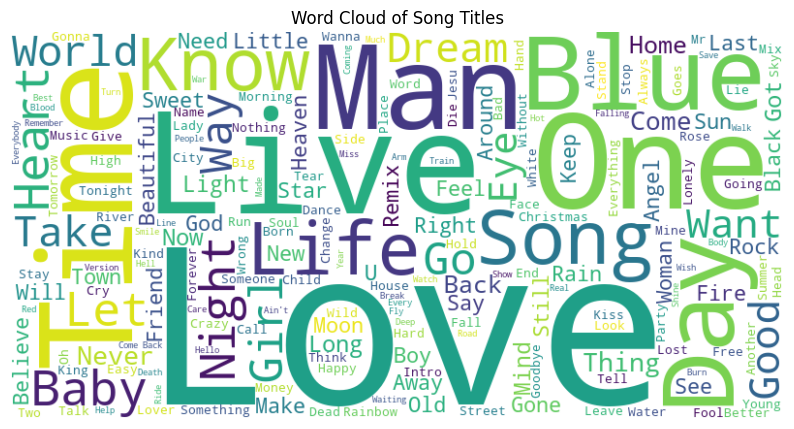

In [11]:
from wordcloud import WordCloud

song_titles = ' '.join(song_data['song'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(song_titles)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Song Titles')
plt.show()

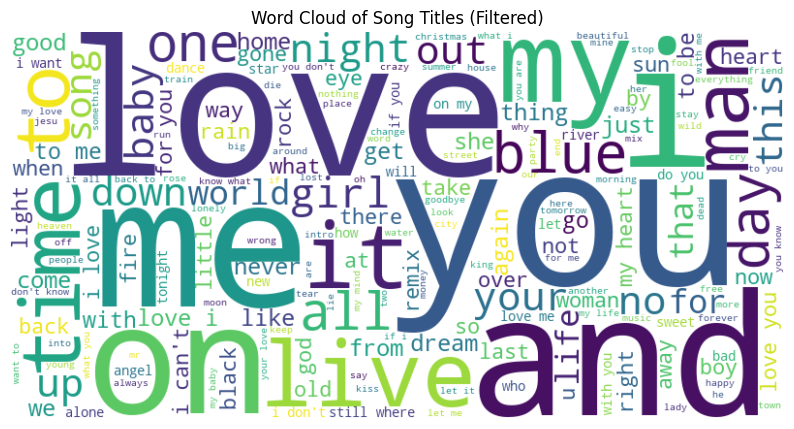

In [13]:
stopwords = ['digital', 'remaster', 'lp', 'version', 'album', 'radio', 'edit', 'explicit', 'in','the','of','a']
filtered_song_titles = ' '.join([word for word in song_titles.lower().split() if word not in stopwords])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(filtered_song_titles)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Song Titles (Filtered)')
plt.show()

In [17]:
lyric_data = pd.read_csv("spotify_millsongdata.csv")

In [18]:
lyric_data.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [14]:
song_data.columns

Index(['Unnamed: 0', 'artist', 'text', 'song', 'label', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'error',
       'cleaned_text', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'lyrics_vector'],
      dtype='object')

In [37]:
lyric_data["text"][0]

"Look at her face, it's a wonderful face  \r\nAnd it means something special to me  \r\nLook at the way that she smiles when she sees me  \r\nHow lucky can one fellow be?  \r\n  \r\nShe's just my kind of girl, she makes me feel fine  \r\nWho could ever believe that she could be mine?  \r\nShe's just my kind of girl, without her I'm blue  \r\nAnd if she ever leaves me what could I do, what could I do?  \r\n  \r\nAnd when we go for a walk in the park  \r\nAnd she holds me and squeezes my hand  \r\nWe'll go on walking for hours and talking  \r\nAbout all the things that we plan  \r\n  \r\nShe's just my kind of girl, she makes me feel fine  \r\nWho could ever believe that she could be mine?  \r\nShe's just my kind of girl, without her I'm blue  \r\nAnd if she ever leaves me what could I do, what could I do?\r\n\r\n"

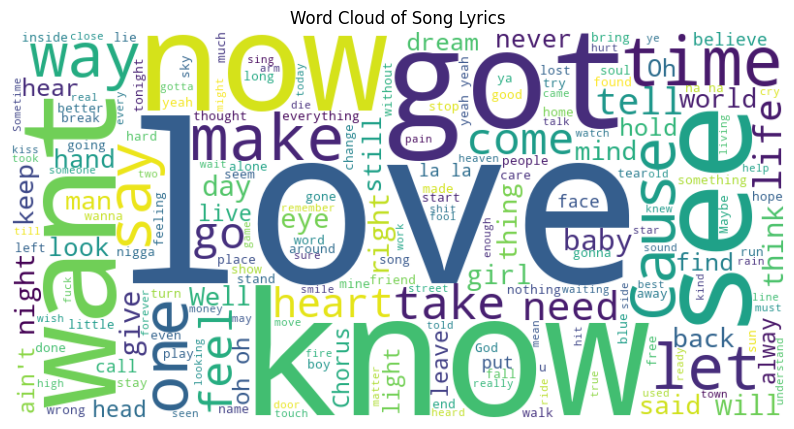

In [15]:
all_lyrics = ' '.join(song_data['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Song Lyrics')
plt.show()

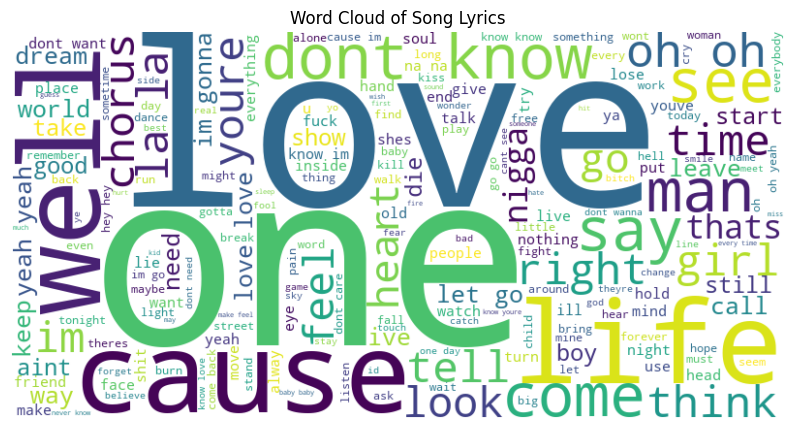

In [16]:
all_lyrics = ' '.join(song_data['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Song Lyrics')
plt.show()

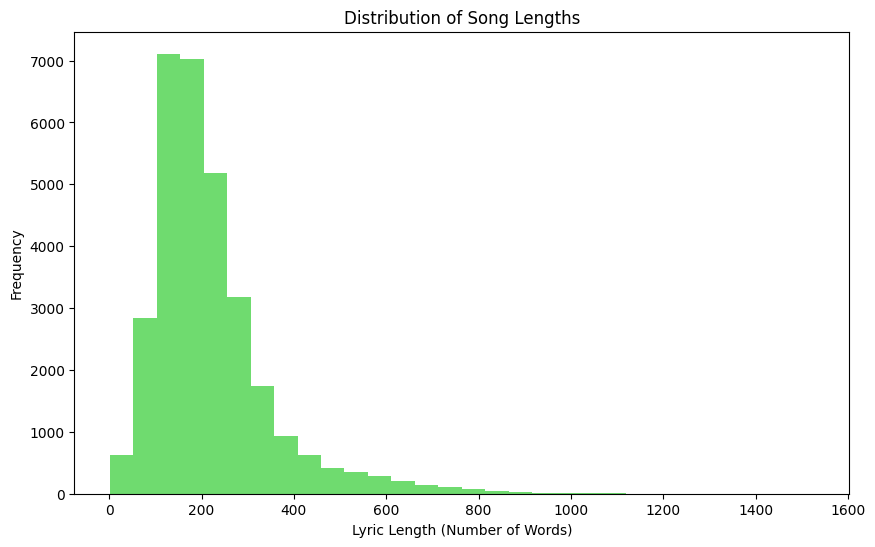

In [18]:
song_data['lyric_length'] = song_data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(song_data['lyric_length'], bins=30, color='limegreen', alpha=0.7)
plt.xlabel('Lyric Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Lengths')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


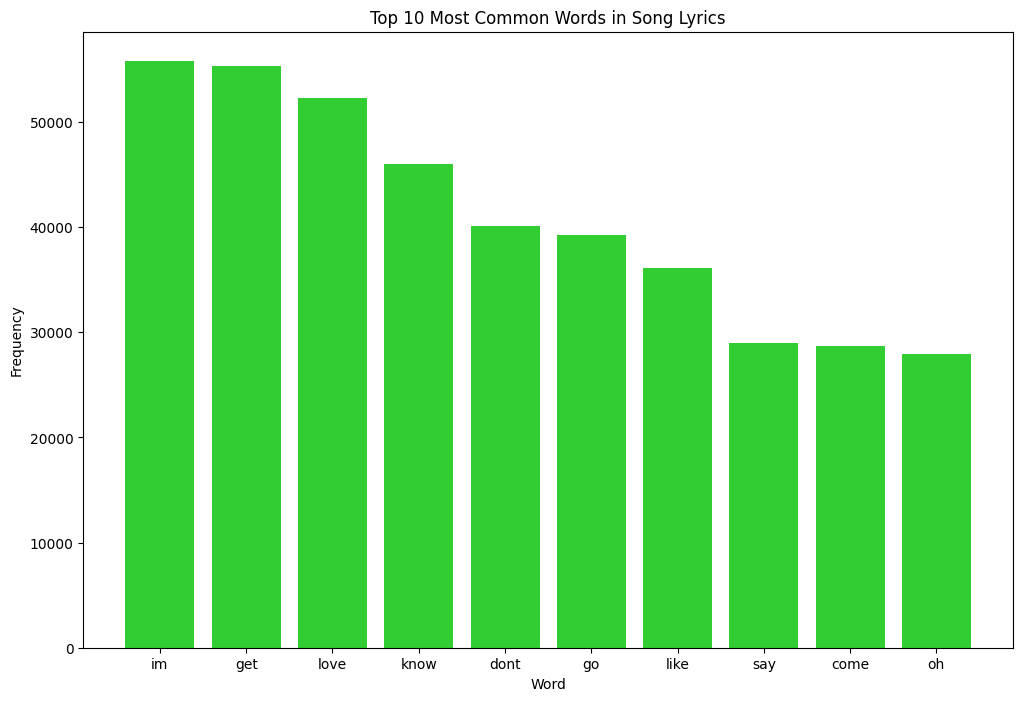

In [20]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

words = [word for lyric in song_data['cleaned_text'] for word in lyric.lower().split() if word not in stop_words]

word_counts = Counter(words)

common_words = word_counts.most_common(10)

plt.figure(figsize=(12, 8))
plt.bar([word[0] for word in common_words], [word[1] for word in common_words], color='limegreen')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Song Lyrics')
plt.show()

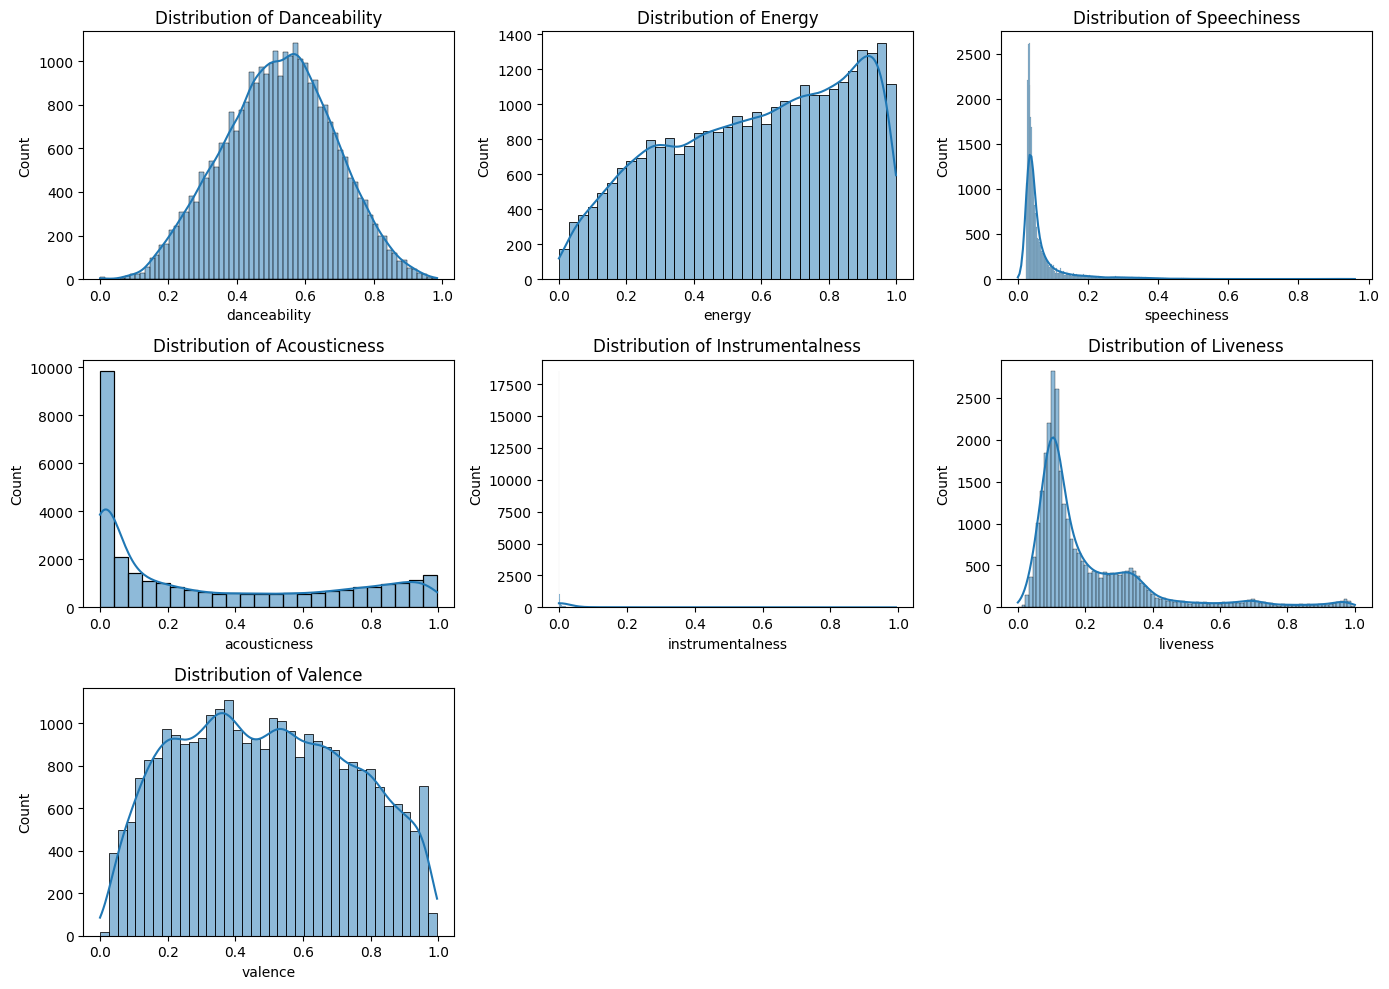

In [23]:
import seaborn as sns
features = [
    'danceability', 'energy', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence'
]

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(song_data[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')

plt.tight_layout()
plt.show()